**Dataset link- https://universe.roboflow.com/project/aerial-cars-rqcqh/dataset/2**

In [1]:
!nvidia-smi

Wed Oct 29 04:27:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Install ultralytics**

In [2]:
!pip install ultralytics

**Import Ultralytics**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/112.6 GB disk)


**Import YOLO**

In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Load Data**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nJBC3Kr2Z6qyZZJgYERo")
project = rf.workspace("imagenes-lmahz").project("aerial-cars-rqcqh")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


**Data Locationt**

In [6]:
dataset.location

'/content/aerial-cars-2'

**Train Dataset**

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
model.train(
    data="/content/aerial-cars-2/data.yaml",
    epochs=50,
    imgsz=640
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aerial-cars-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7803e0c18e30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

**See various things after training, like- confusion matrix,labels etc**

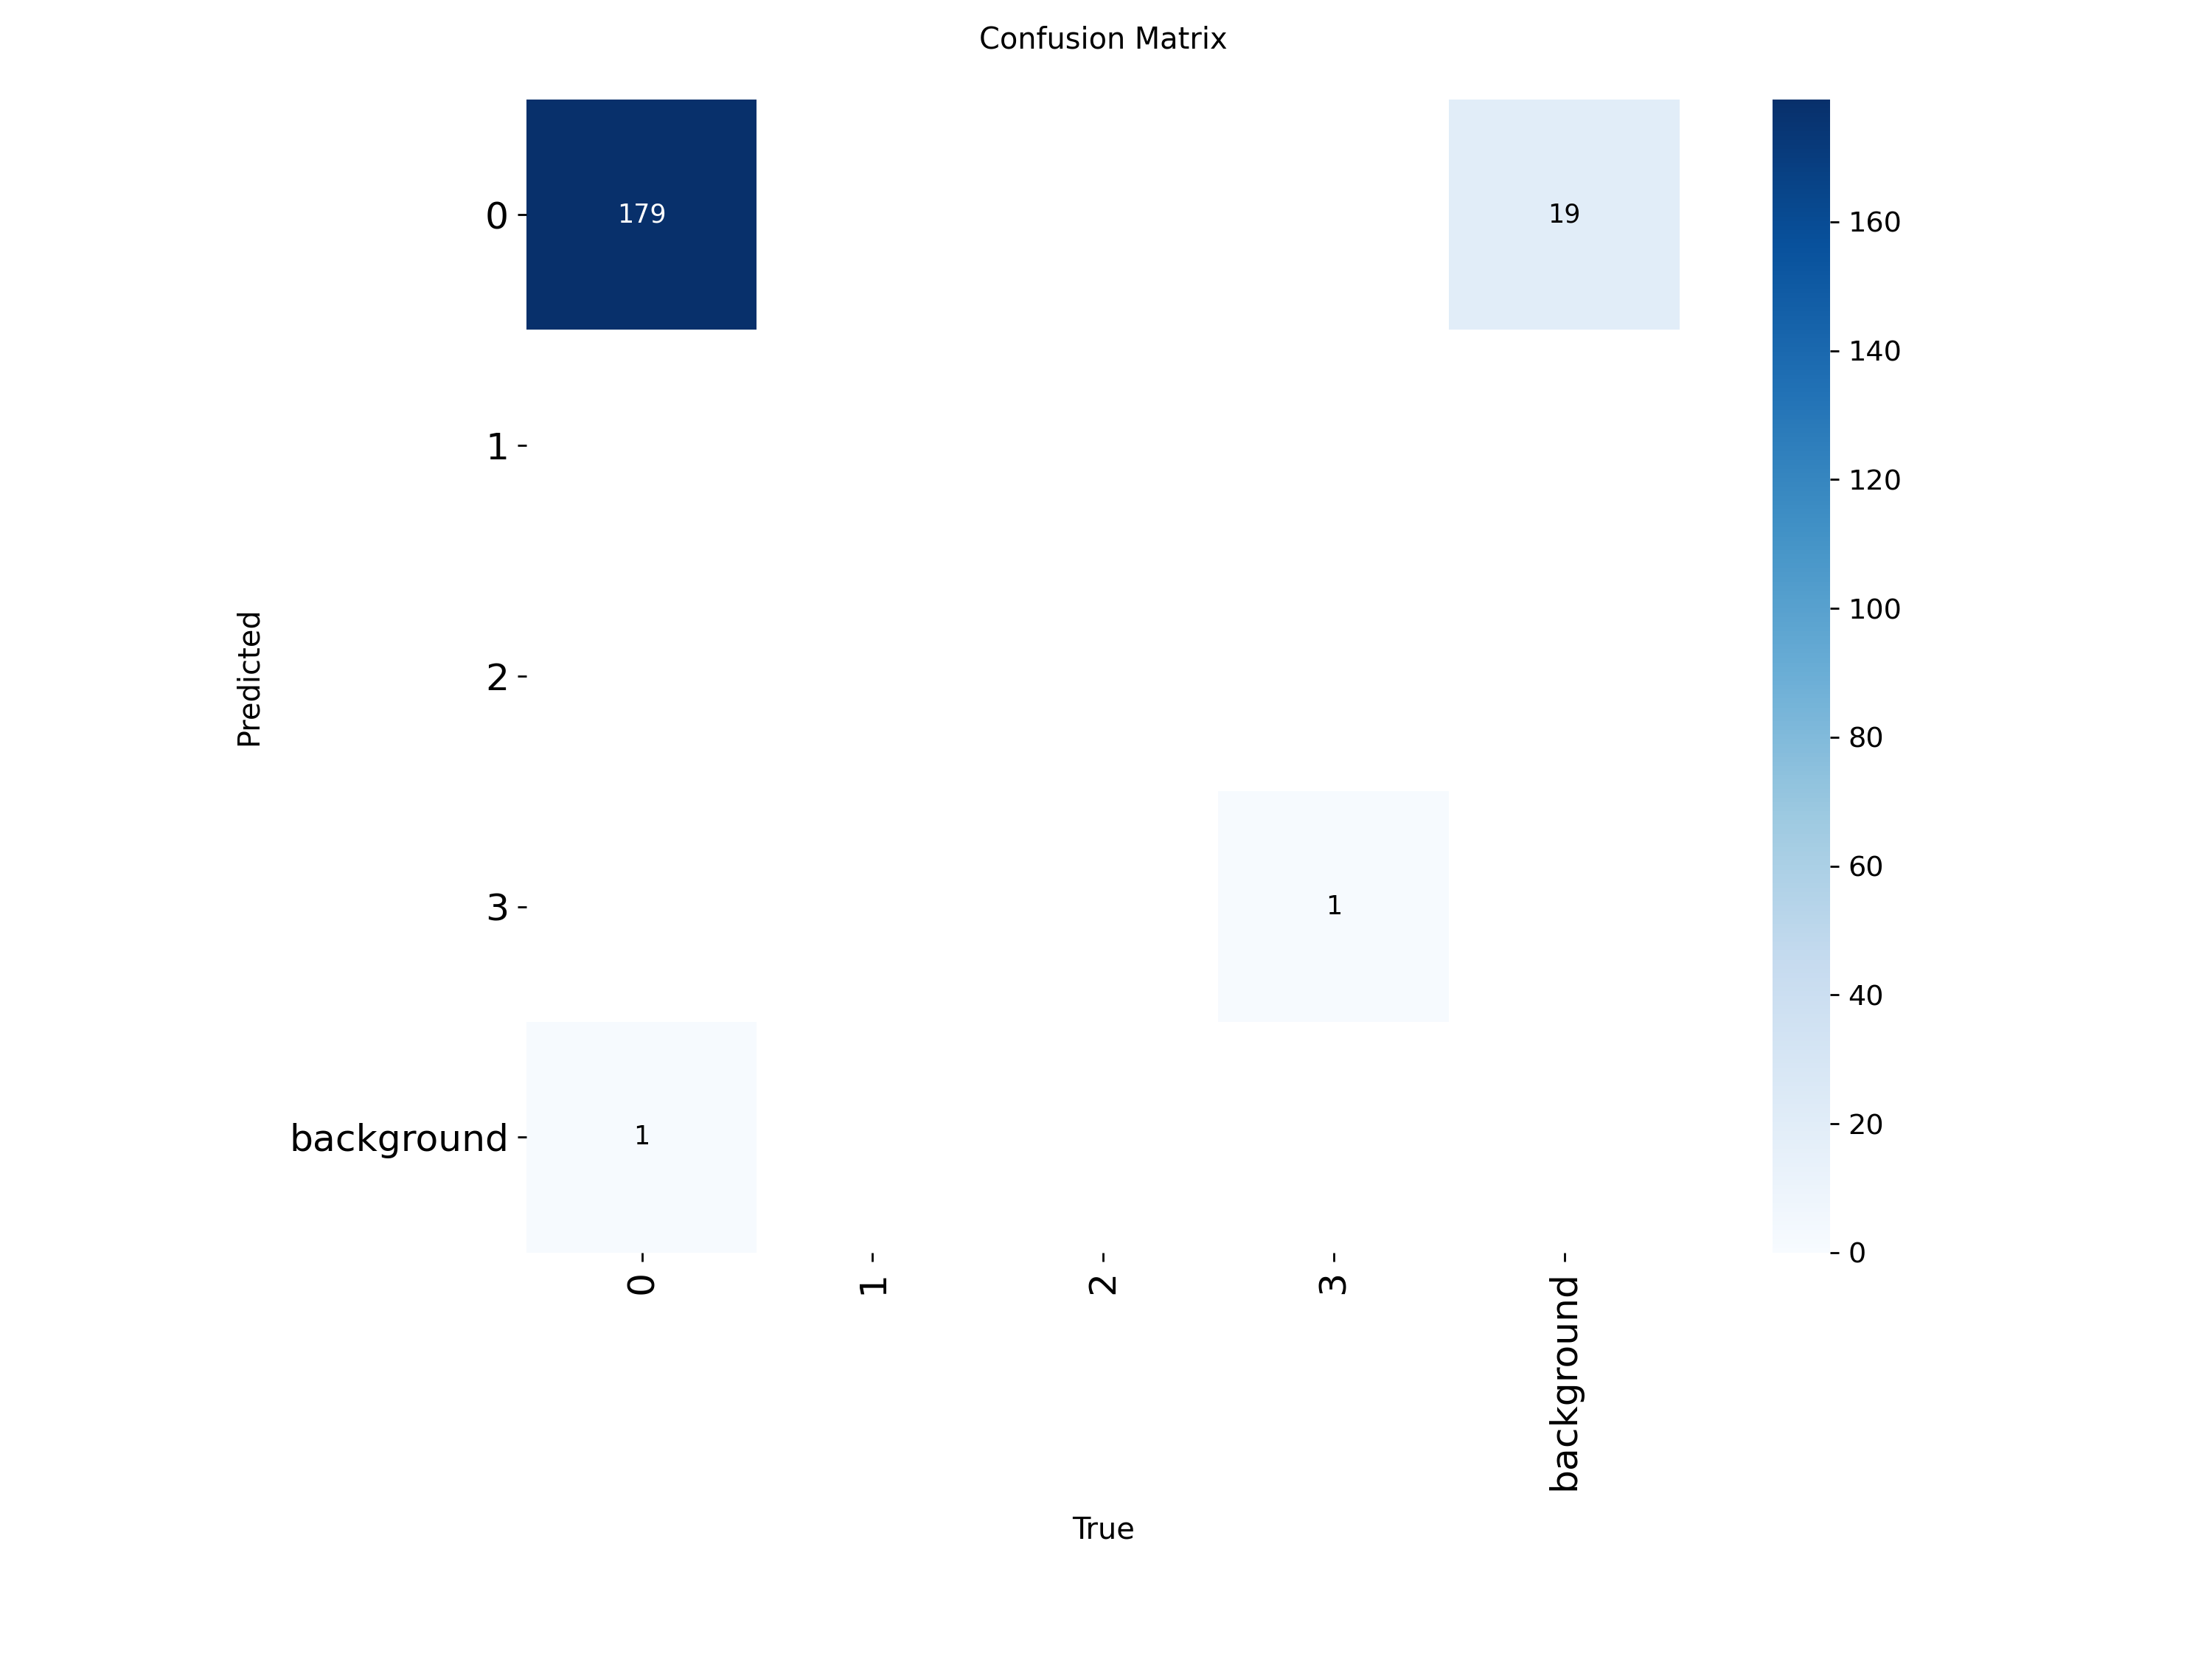

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=500)

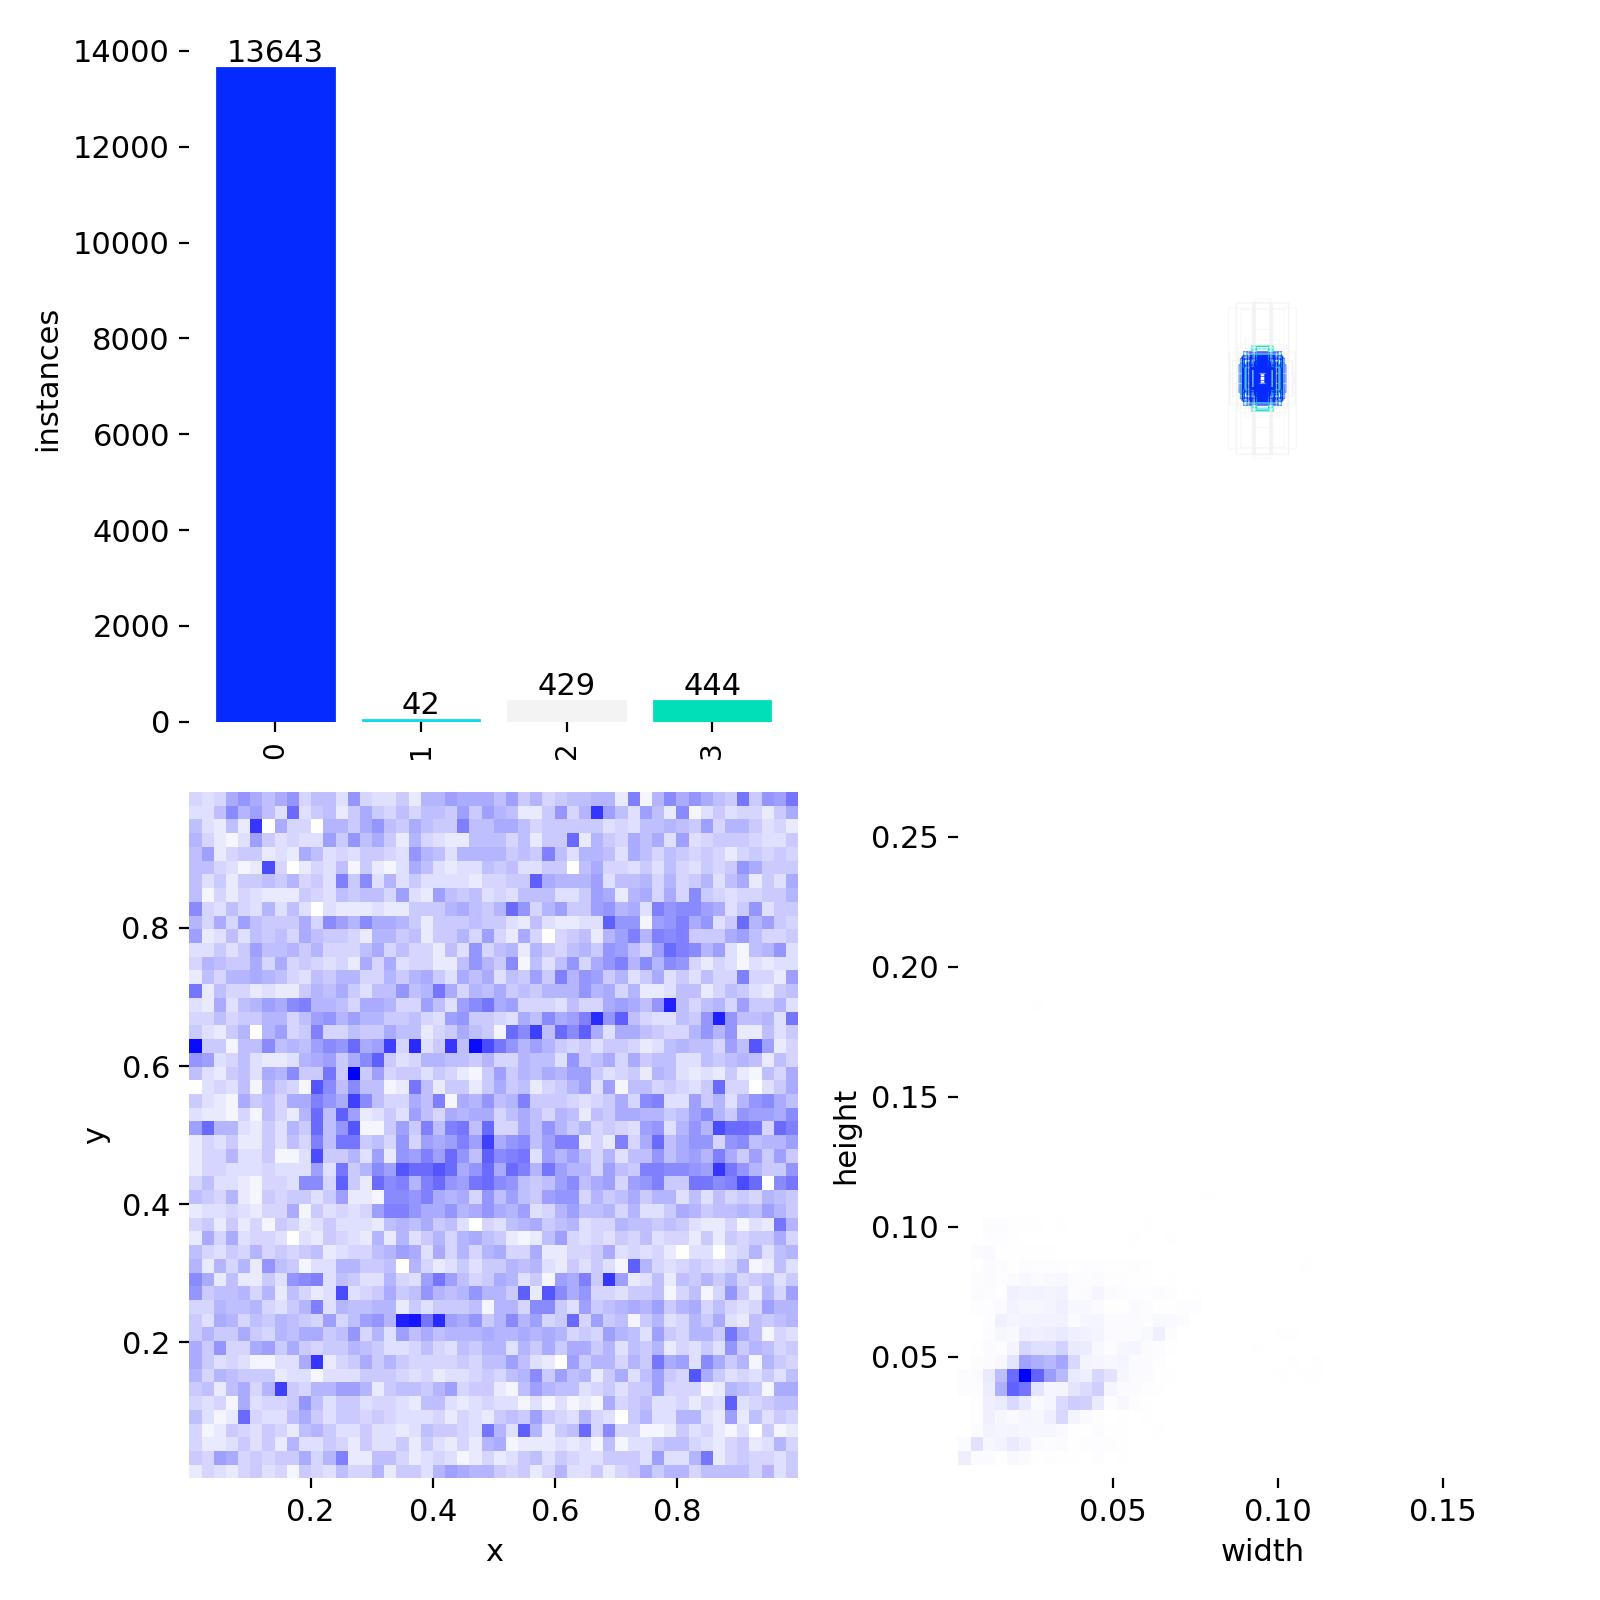

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

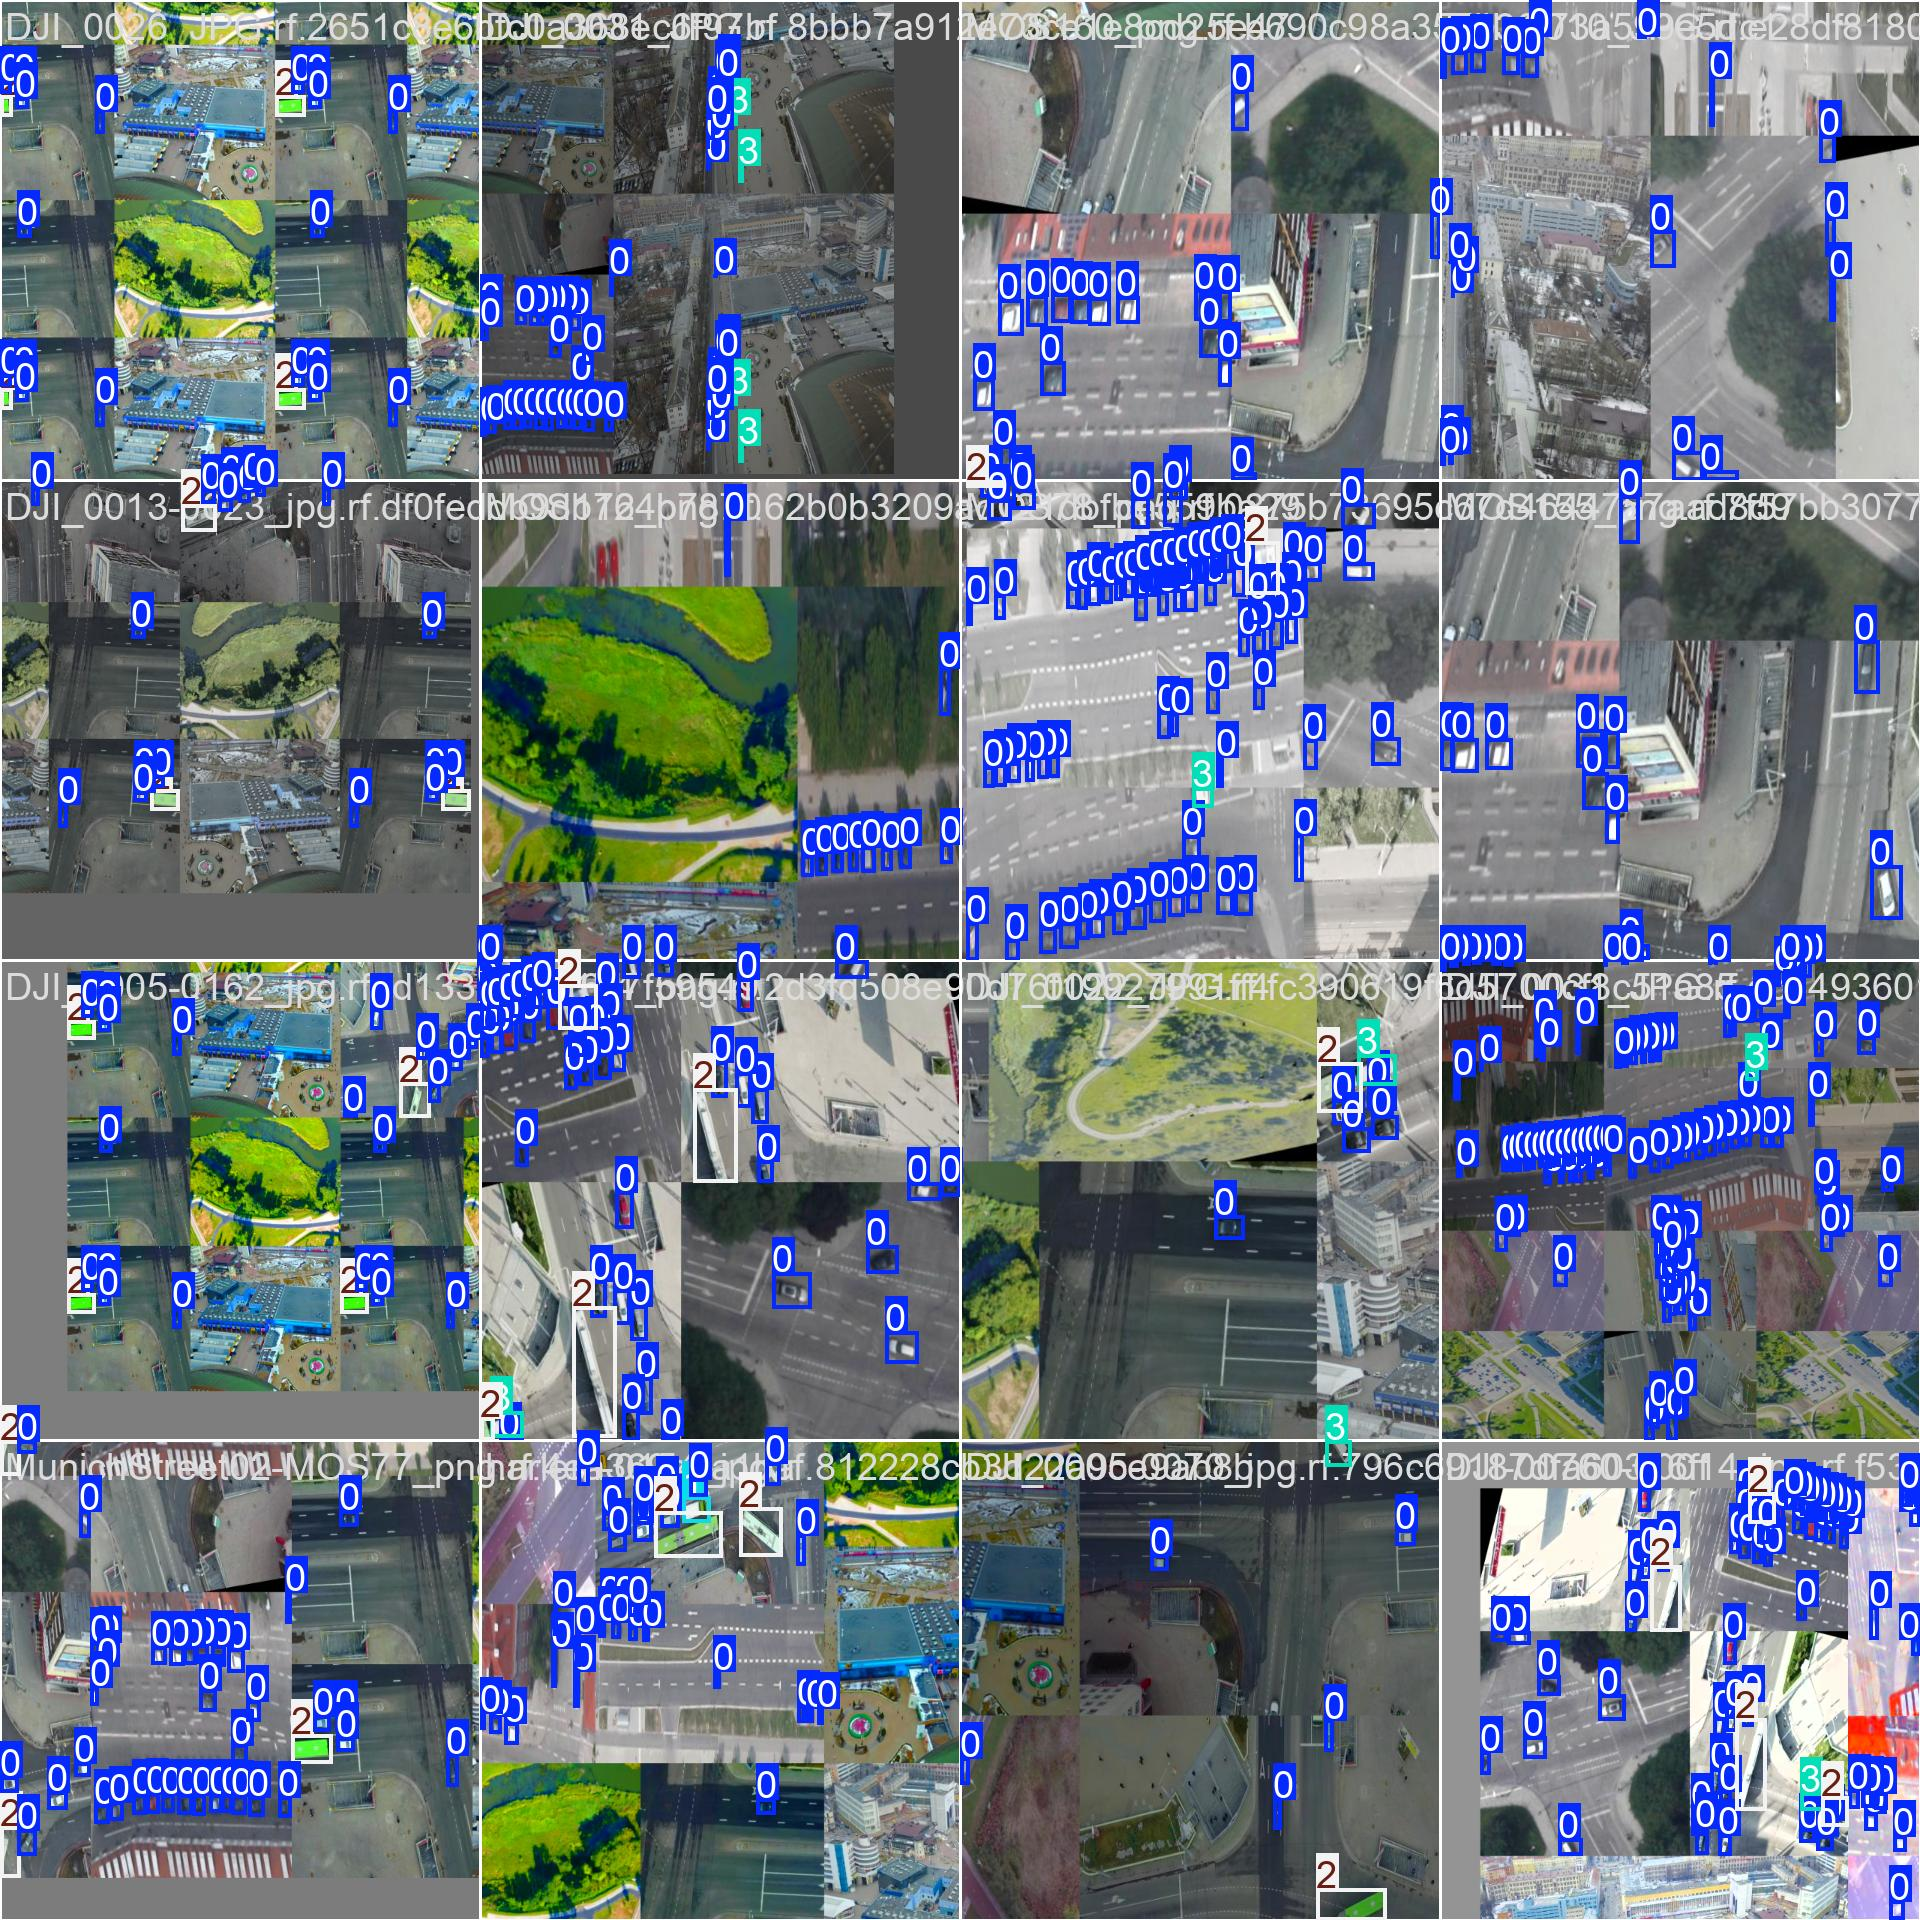

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=800)

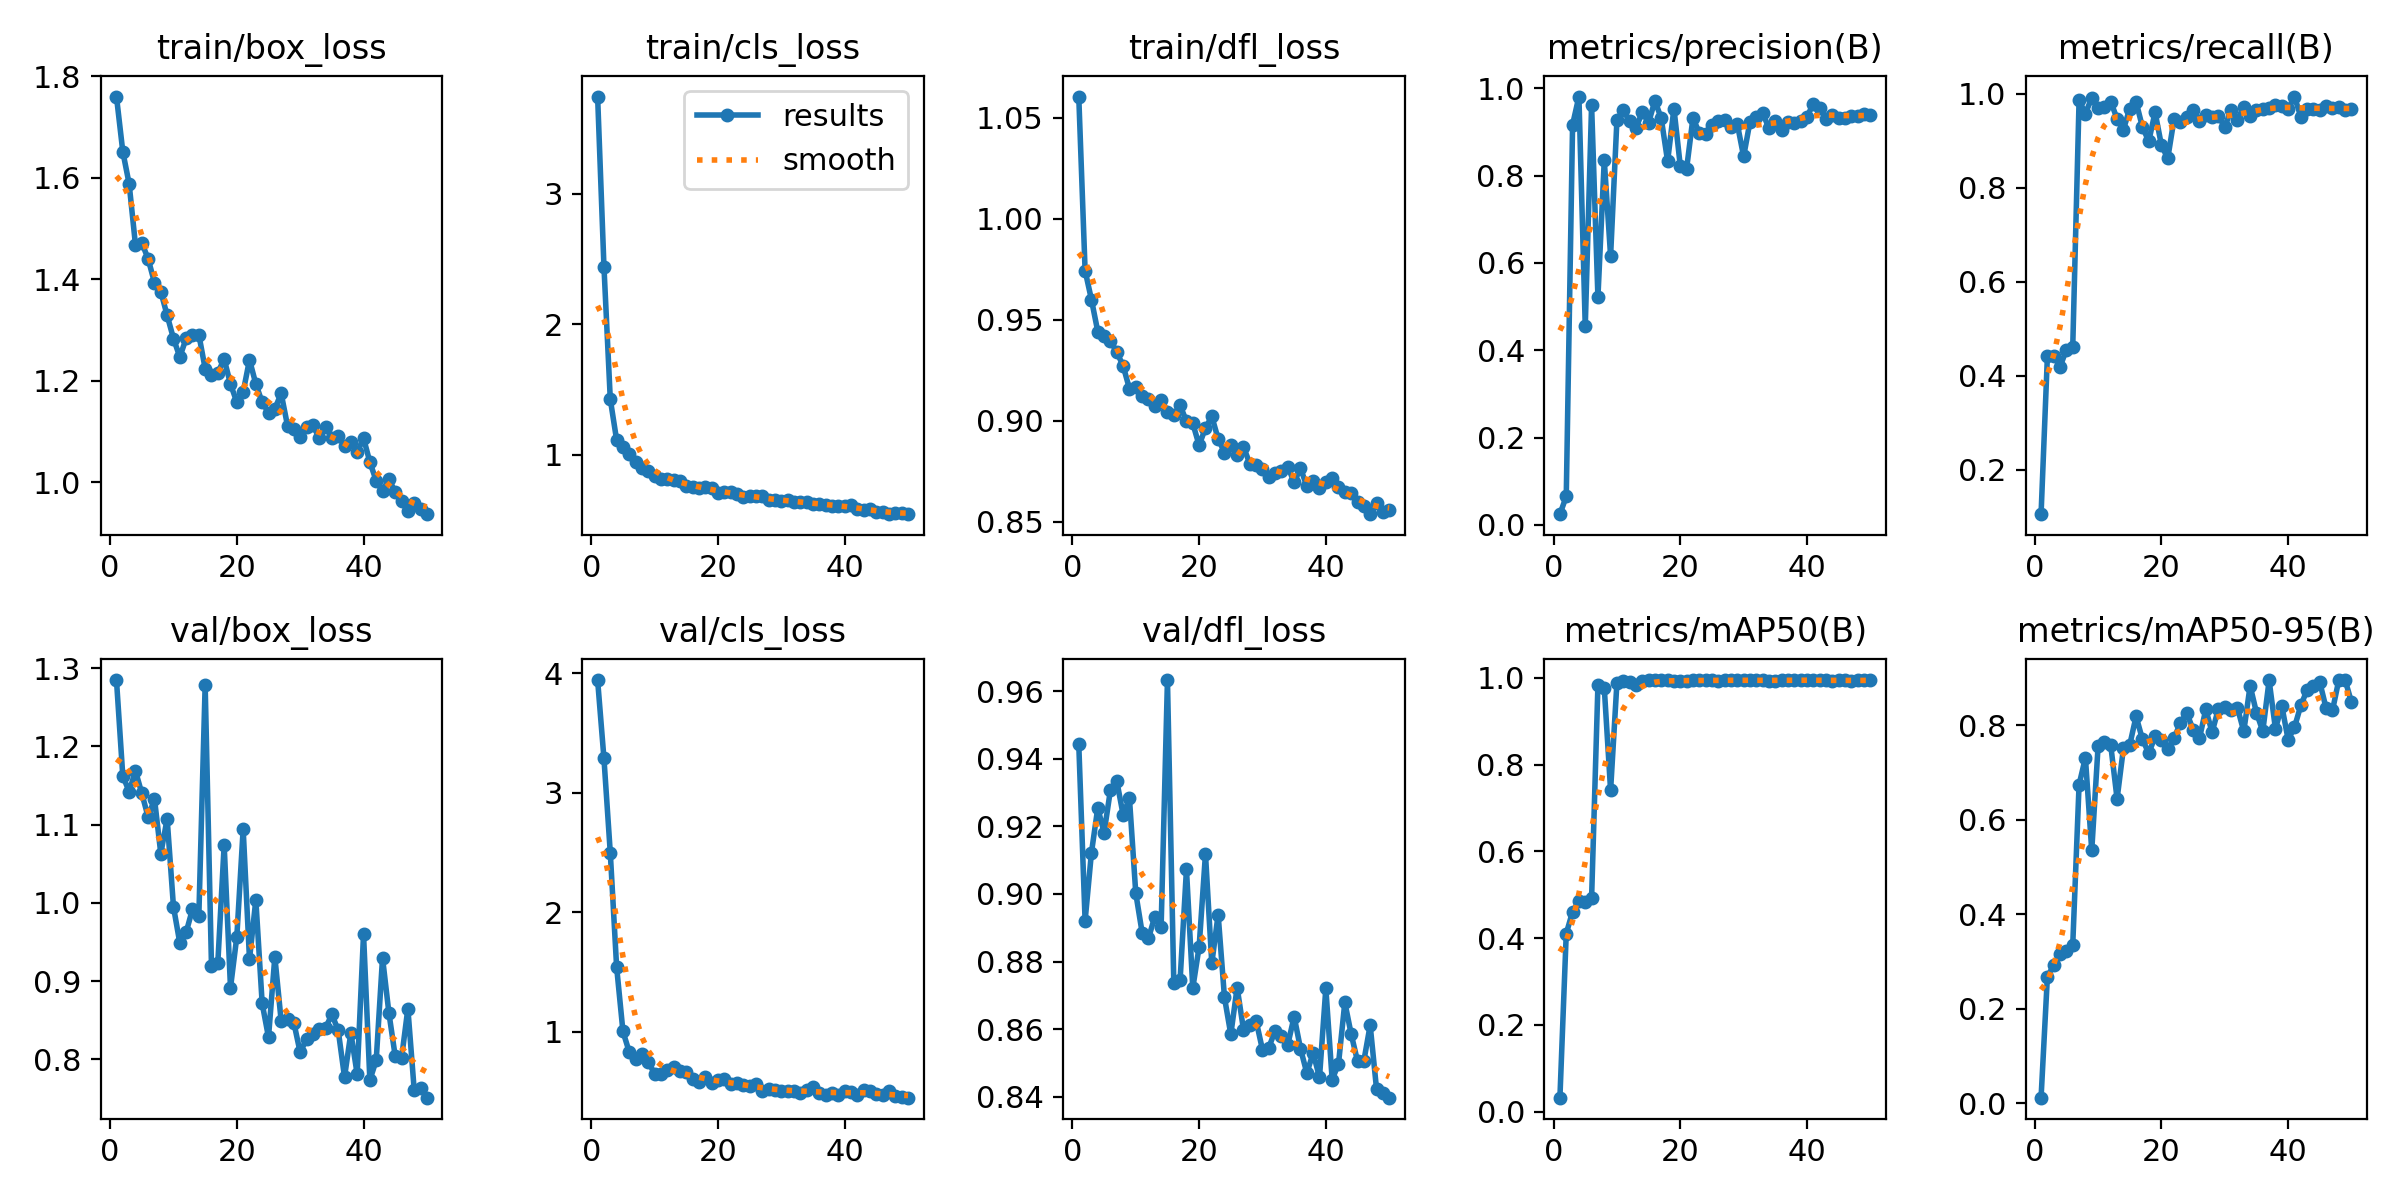

In [12]:
Image("/content/runs/detect/train/results.png", width=600)

**Validate Fine Tune Model**

In [14]:
# Load your fine-tuned model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Validate on validation dataset
results = model.val(
    data="/content/aerial-cars-2/data.yaml",  # must include validation images
    batch=16,
    imgsz=640,
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1556.6±543.6 MB/s, size: 50.2 KB)
val: Scanning /content/aerial-cars-2/test/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 20.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.3it/s 0.3s
                   all         10        181      0.936      0.972      0.994       0.85
                     0         10        180      0.988      0.943      0.993      0.804
                     3          1          1      0.883          1      0.995      0.895
Speed: 1.3ms preprocess, 12.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val


**Inference(Trained model to make prediction on new,unseen data) on custom data**

In [19]:
# 1- Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# 2- Run inference on a single image
results = model.predict(
    source="/content/aerial-cars-2/test/images",  # path to your new image
    conf=0.5,                          # confidence threshold
    save=True,                         # save the output image with bounding boxes
    show=True                           # display image in notebook
)


image 1/10 /content/aerial-cars-2/test/images/MOS74_png.rf.12922affff7bd6959bcca3dd144f3613.jpg: 640x640 25 0s, 18.9ms
image 2/10 /content/aerial-cars-2/test/images/MOS77_png.rf.ef5f423c1a6b44fe5f282aff0eb2283e.jpg: 640x640 27 0s, 14.8ms
image 3/10 /content/aerial-cars-2/test/images/MOS80_png.rf.54680a1554f74dd32087fb11621b2934.jpg: 640x640 27 0s, 11.5ms
image 4/10 /content/aerial-cars-2/test/images/MOS89_png.rf.5a05e268155af6f9a59bc3fcd21a4150.jpg: 640x640 27 0s, 14.4ms
image 5/10 /content/aerial-cars-2/test/images/MOS91_png.rf.a268dfe52ee893937a00e513dcf5f414.jpg: 640x640 25 0s, 10.2ms
image 6/10 /content/aerial-cars-2/test/images/MunichStreet02-MOS79_png.rf.2b737e9f9b78f408707caa2a7ff1f8d2.jpg: 640x640 36 0s, 1 3, 14.0ms
image 7/10 /content/aerial-cars-2/test/images/harlem-0005_jpg.rf.385d3c0e5f0ec9319960d1d29be42af0.jpg: 640x640 4 0s, 12.1ms
image 8/10 /content/aerial-cars-2/test/images/harlem-0021_jpg.rf.3093fbb1852232fa496d1f6cb863a20f.jpg: 640x640 5 0s, 9.9ms
image 9/10 /conten

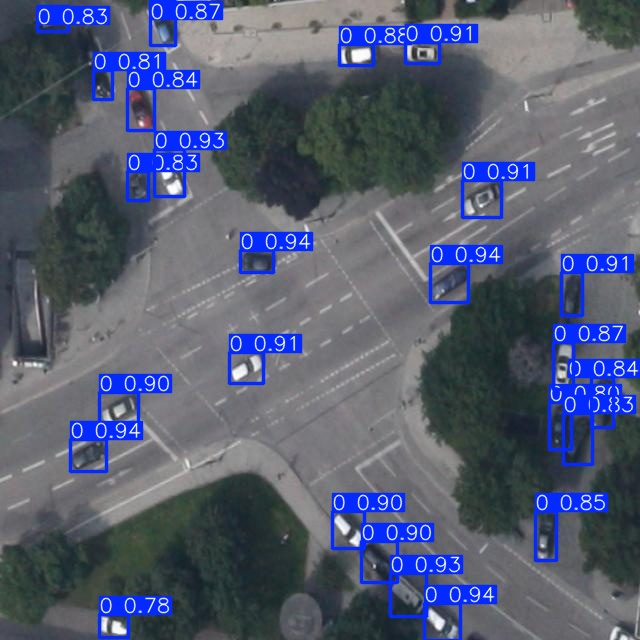

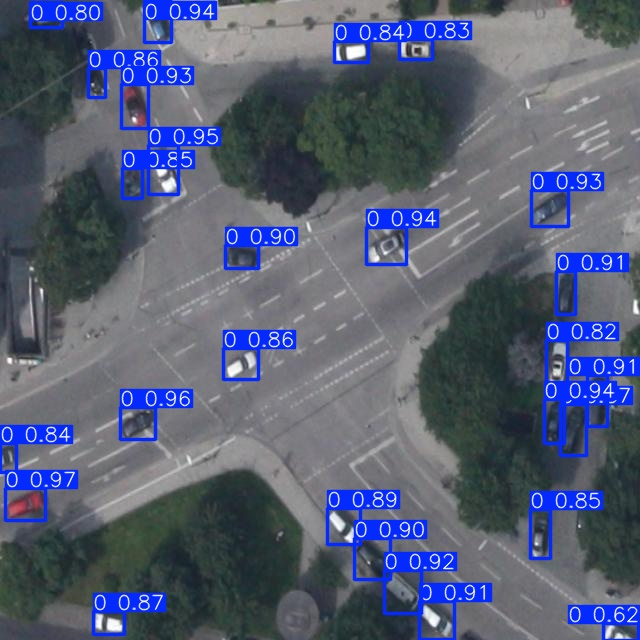

In [22]:
from PIL import Image as PILImage
from IPython.display import display
import os

# Folder where YOLO saved predictions
pred_folder = "/content/runs/detect/predict2"

# Get sorted list of image files
image_files = sorted([f for f in os.listdir(pred_folder) if f.endswith((".jpg", ".png"))])

# Display only the first two images
for file in image_files[:2]:  # <-- slice to take first 2
    display(PILImage.open(os.path.join(pred_folder, file)))
